In [11]:
import time
import re
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import nltk
import textblob

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.imdb.com/title/tt0499549/reviews?ref_=tt_urv")



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\Zac\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
<ipython-input-2-94c1f98292c2>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [7]:
i = 0
while i <= 120: 
    driver.find_element_by_xpath("/html/body/div[3]/div/div[2]/div[3]/div[1]/section/div[2]/div[4]/div/button").click()
    time.sleep(2)
    i += 1 

<ipython-input-7-cc43a986dada>:3: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath("/html/body/div[3]/div/div[2]/div[3]/div[1]/section/div[2]/div[4]/div/button").click()


In [8]:
soup = BeautifulSoup(driver.page_source,'html.parser')
soup_list = soup.findAll('div', attrs = {'class': re.compile(r'^text show-more__control[ clickable]*$')} )
len(soup_list)

3098

### Analysis using WorldCloud 

In [44]:
all_review_text = ''.join([str(reviews.text) for reviews in soup_list])


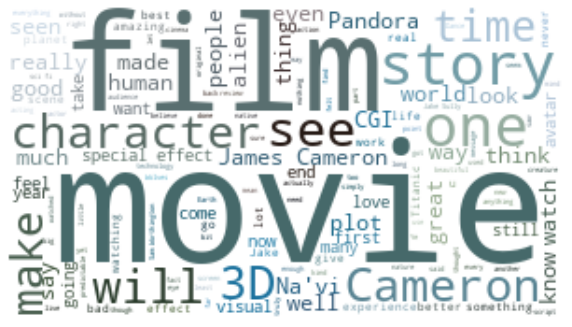

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

mask = np.array(Image.open('Avatar.jpg')) 
color= ImageColorGenerator(mask)

wordcloud = WordCloud(width=1920,
                      height=1080,
                      max_words=500,
                      mask=mask,
                      stopwords=STOPWORDS,
                      background_color='white',
                      random_state=42).generate(text)

plt.figure(figsize=(10,10)) # inches
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=color),interpolation='bilinear')
plt.show()

### Analysis using Bag of Word

In [40]:
all_review_list = [str(reviews.text) for reviews in soup_list]
len(all_review_list)

3098

In [57]:
import pandas as pd
data = {
    'Movie': all_review_list
}

data_set = pd.DataFrame(data)
data_set

Movie
0     As of today, there are 2675 reviews for "Avata...
1     I did see Avatar for the first time a while ag...
2     Avatar (2009) **** (out of 4)A paraplegic mari...
3     It's impossible to watch AVATAR for the first ...
4     Marine Jake Sully (Sam Worthington) is paralyz...
...                                                 ...
3093  The movie was beautiful! Utterly breathtaking....
3094  This was the best movie I have ever seen, by f...
3095  To be honest, I didn't really know what to exp...
3096  This movie lacks originality. This guy has cop...
3097  First off, I'll explain my situation before wa...

[3098 rows x 1 columns]

In [61]:
import nltk
def cleanData(raw_text):    
    from nltk.corpus import stopwords
    from nltk.stem.porter import PorterStemmer
    from nltk.tokenize import RegexpTokenizer
    from nltk.stem.wordnet import WordNetLemmatizer

    # Custom Stopwords
    new_words = []
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words.union(set(new_words))
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(raw_text)

    wordsFiltered=[]
    for word in words:
        if word.lower() not in stop_words:
            wordsFiltered.append(word)
    
    lem = WordNetLemmatizer()
    wordsLemmatized=[]
    #Lemmatisation
    for word in wordsFiltered:
        wordsLemmatized.append(lem.lemmatize(word))
    
#   Convert to lowercase
    str=''
    for w in wordsLemmatized:
        str = str+' '+w.lower()
    return str

In [62]:
data_set['cleaned_reviews'] = data_set.apply(lambda row:cleanData(row['Movie']), axis = 1) # apply function to each row
data_set['cleaned_reviews']

0        today 2675 review avatar many excellent revie...
1        see avatar first time ago know make felt like...
2        avatar 2009 4 paraplegic marine sam worthingt...
3        impossible watch avatar first time especially...
4        marine jake sully sam worthington paralyzed b...
                              ...                        
3093     movie beautiful utterly breathtaking plot fin...
3094     best movie ever seen far like star wars lord ...
3095     honest really know expect avatar thinking get...
3096     movie lack originality guy copied idea 1 matr...
3097     first explain situation watching movie seen p...
Name: cleaned_reviews, Length: 3098, dtype: object

In [63]:
freq = pandas.Series(''.join(data_set['cleaned_reviews']).split()).value_counts()[:20]
print(freq)

movie        10796
film          6505
avatar        5438
story         3985
cameron       3923
like          3621
one           3210
see           2498
time          2438
3d            2426
character     2414
good          2289
world         2285
effect        2147
people        2016
james         1936
even          1908
really        1901
would         1885
make          1823
dtype: int64


In [64]:
freq = pandas.Series(''.join(data_set['cleaned_reviews']).split()).value_counts()[-20:]
print(freq)

tainted           1
hypeit            1
mumble            1
lifetree          1
defenders         1
kinesthetics      1
robinson          1
slumming          1
fatter            1
practitioner      1
neanderthal       1
desk              1
unsuccessfully    1
exaggeratedly     1
bleed             1
comedian          1
endeavoured       1
wud               1
pedology          1
pigheaded         1
dtype: int64


In [65]:
#WorldCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
clean_reviews = data_set['cleaned_reviews'].tolist()


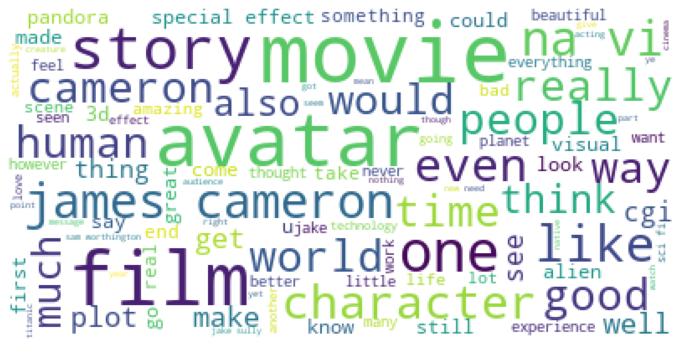

In [71]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# Remark: input data is list of sentences
wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100,max_font_size=50, random_state=42).generate(str(clean_reviews))

fig = plt.figure(figsize=(12, 8),)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(clean_reviews)

print(X)
# print(vectorizer.get_feature_names())

  (0, 17580)	1
  (0, 240)	1
  (0, 14633)	3
  (0, 1563)	3
  (0, 6313)	2
  (0, 14635)	1
  (0, 14529)	1
  (0, 5993)	1
  (0, 6857)	11
  (0, 14634)	1
  (0, 17520)	2
  (0, 10010)	1
  (0, 15310)	1
  (0, 10550)	1
  (0, 13800)	1
  (0, 10395)	1
  (0, 15115)	2
  (0, 14996)	1
  (0, 14)	1
  (0, 4176)	1
  (0, 10557)	1
  (0, 14010)	3
  (0, 11907)	1
  (0, 2832)	1
  (0, 13946)	1
  :	:
  (3097, 13459)	1
  (3097, 8521)	4
  (3097, 8424)	1
  (3097, 5574)	1
  (3097, 8652)	1
  (3097, 5717)	1
  (3097, 7998)	2
  (3097, 19081)	1
  (3097, 14099)	1
  (3097, 15758)	1
  (3097, 2785)	1
  (3097, 1489)	1
  (3097, 12628)	1
  (3097, 15756)	1
  (3097, 7271)	1
  (3097, 8161)	1
  (3097, 3620)	1
  (3097, 6405)	1
  (3097, 13406)	1
  (3097, 10547)	1
  (3097, 2149)	1
  (3097, 6433)	1
  (3097, 5391)	1
  (3097, 16251)	1
  (3097, 7689)	1


[Text(0, 0, 'movie'),
 Text(1, 0, 'film'),
 Text(2, 0, 'avatar'),
 Text(3, 0, 'story'),
 Text(4, 0, 'cameron'),
 Text(5, 0, 'like'),
 Text(6, 0, 'one'),
 Text(7, 0, 'see'),
 Text(8, 0, 'time'),
 Text(9, 0, '3d'),
 Text(10, 0, 'character'),
 Text(11, 0, 'good'),
 Text(12, 0, 'world'),
 Text(13, 0, 'effect'),
 Text(14, 0, 'people'),
 Text(15, 0, 'james'),
 Text(16, 0, 'even'),
 Text(17, 0, 'really'),
 Text(18, 0, 'would'),
 Text(19, 0, 'make')]

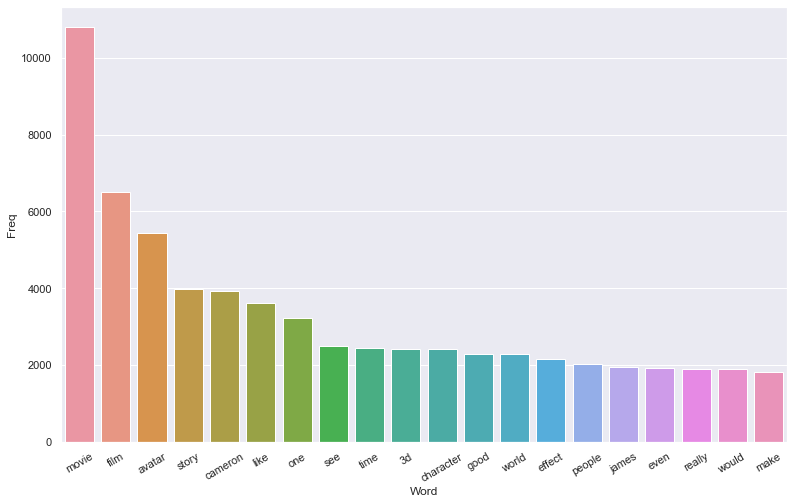

In [74]:
import pandas 
def get_top_n_words(corpus,n=None):
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = CountVectorizer().fit_transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    word_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(word_freq, key=lambda x:x[1],reverse=True) 
    return words_freq[:n] 

top_words = get_top_n_words(clean_reviews, n=20)
top_df= pandas.DataFrame(top_words)
top_df.columns=["Word","Freq"]

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word",y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

[Text(0, 0, 'james cameron'),
 Text(1, 0, 'na vi'),
 Text(2, 0, 'special effect'),
 Text(3, 0, 'sci fi'),
 Text(4, 0, 'sam worthington'),
 Text(5, 0, 'jake sully'),
 Text(6, 0, 'dances wolves'),
 Text(7, 0, 'sigourney weaver'),
 Text(8, 0, 'star wars'),
 Text(9, 0, 'visual effect'),
 Text(10, 0, 'zoe saldana'),
 Text(11, 0, 'see movie'),
 Text(12, 0, 'ever seen'),
 Text(13, 0, 'stephen lang'),
 Text(14, 0, 'science fiction'),
 Text(15, 0, 'movie ever'),
 Text(16, 0, 'best movie'),
 Text(17, 0, 'world pandora'),
 Text(18, 0, 'bad guy'),
 Text(19, 0, 'feel like')]

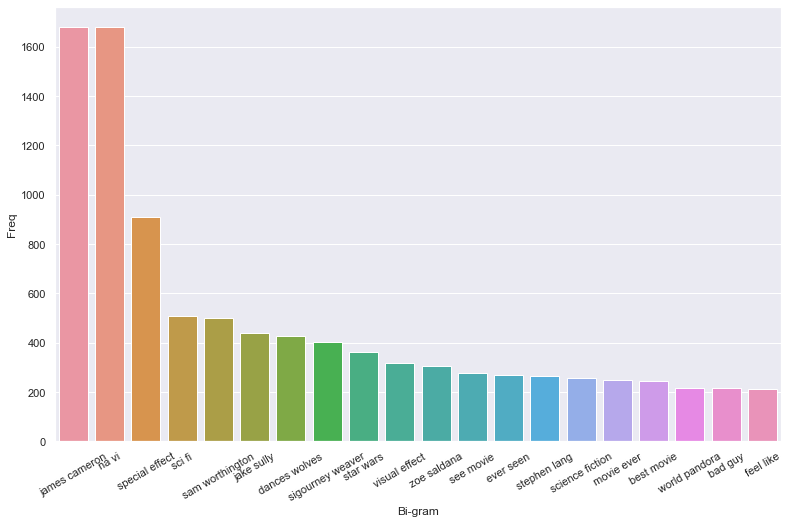

In [75]:
def get_top_n2_words(corpus,n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(word_freq, key=lambda x:x[1],reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top2_words = get_top_n2_words(clean_reviews, n=20)
top2_df= pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram","Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Bi-gram",y="Freq", data=top2_df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

[Text(0, 0, 'best movie ever'),
 Text(1, 0, 'sully sam worthington'),
 Text(2, 0, 'jake sully sam'),
 Text(3, 0, 'sci fi movie'),
 Text(4, 0, 'movie ever made'),
 Text(5, 0, 'movie ever seen'),
 Text(6, 0, 'james cameron avatar'),
 Text(7, 0, 'na vi people'),
 Text(8, 0, 'dr grace augustine'),
 Text(9, 0, 'director james cameron'),
 Text(10, 0, 'colonel miles quaritch'),
 Text(11, 0, 'one best movie'),
 Text(12, 0, 'neytiri zoe saldana'),
 Text(13, 0, 'film ever made'),
 Text(14, 0, 'called na vi'),
 Text(15, 0, 'human na vi'),
 Text(16, 0, 'movie james cameron'),
 Text(17, 0, 'two half hour'),
 Text(18, 0, 'highest grossing film'),
 Text(19, 0, 'film ever seen')]

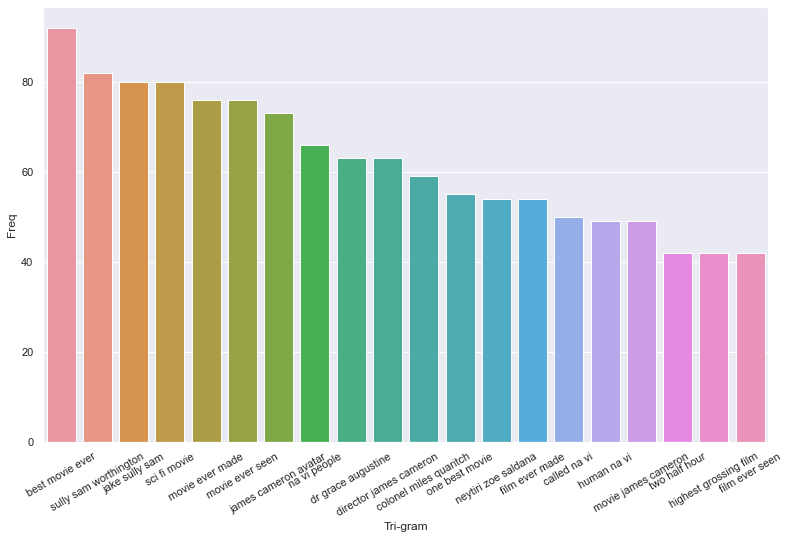

In [76]:
# Visualize top N uni-grams, bi-grams & tri-grams
def get_top_n3_words(corpus,n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(word_freq, key=lambda x:x[1],reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top3_words = get_top_n3_words(clean_reviews, n=20)
top3_df= pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram","Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Tri-gram",y="Freq", data=top3_df)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

### Analysis using Tokenization to analyze most appear word. 

In [9]:
def removeStopwordsAndPunctuations(raw_text):
    from nltk.corpus import stopwords
    stopwords = set(stopwords.words('english'))    
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(raw_text) 

    wordsFiltered=[]
    for word in words:
        if word not in stopwords:
            wordsFiltered.append(word)

    return wordsFiltered

In [12]:
all_reviews = []
for soup in soup_list:
    review = soup.text.lower()
    clean_review = removeStopwordsAndPunctuations(review)
    all_reviews.append(clean_review)

all_reviews

[['today',
  '2675',
  'reviews',
  'avatar',
  'many',
  'excellent',
  'reviewers',
  'respect',
  'enjoy',
  'film',
  'reviewed',
  'many',
  'times',
  'late',
  'seeing',
  'make',
  'review',
  'quick',
  'whole',
  'lot',
  'say',
  'already',
  'said',
  'although',
  'almost',
  '10000',
  'reviews',
  'credit',
  'making',
  'real',
  'nut',
  'case',
  'rarely',
  'ever',
  'see',
  'blockbuster',
  'films',
  'heck',
  'never',
  'seen',
  'jurassic',
  'park',
  'mostly',
  'go',
  'theaters',
  'see',
  'movies',
  'daughters',
  'want',
  'see',
  'oscar',
  'nominated',
  'shorts',
  'shown',
  'winter',
  'fact',
  'never',
  'saw',
  'avatar',
  'theaters',
  'surprising',
  'see',
  'film',
  'well',
  'netflix',
  'likely',
  'post',
  'office',
  'made',
  'mistake',
  'supposed',
  'watch',
  'ealing',
  'studios',
  'comedy',
  'sort',
  'thing',
  'film',
  'snob',
  'would',
  'adore',
  'package',
  'ripped',
  'open',
  'avatar',
  'inside',
  'seen',
  '3',

In [54]:
i = 0
words = []
while i < len(all_reviews):
    a = all_reviews[i]    
    for word in a:        
        words.append(word)
        
    i += 1

words

['today',
 '2675',
 'reviews',
 'avatar',
 'many',
 'excellent',
 'reviewers',
 'respect',
 'enjoy',
 'film',
 'reviewed',
 'many',
 'times',
 'late',
 'seeing',
 'make',
 'review',
 'quick',
 'whole',
 'lot',
 'say',
 'already',
 'said',
 'although',
 'almost',
 '10000',
 'reviews',
 'credit',
 'making',
 'real',
 'nut',
 'case',
 'rarely',
 'ever',
 'see',
 'blockbuster',
 'films',
 'heck',
 'never',
 'seen',
 'jurassic',
 'park',
 'mostly',
 'go',
 'theaters',
 'see',
 'movies',
 'daughters',
 'want',
 'see',
 'oscar',
 'nominated',
 'shorts',
 'shown',
 'winter',
 'fact',
 'never',
 'saw',
 'avatar',
 'theaters',
 'surprising',
 'see',
 'film',
 'well',
 'netflix',
 'likely',
 'post',
 'office',
 'made',
 'mistake',
 'supposed',
 'watch',
 'ealing',
 'studios',
 'comedy',
 'sort',
 'thing',
 'film',
 'snob',
 'would',
 'adore',
 'package',
 'ripped',
 'open',
 'avatar',
 'inside',
 'seen',
 '3',
 'huge',
 'screen',
 'fortunately',
 'least',
 'saw',
 '58',
 'tv',
 'best',
 'could',


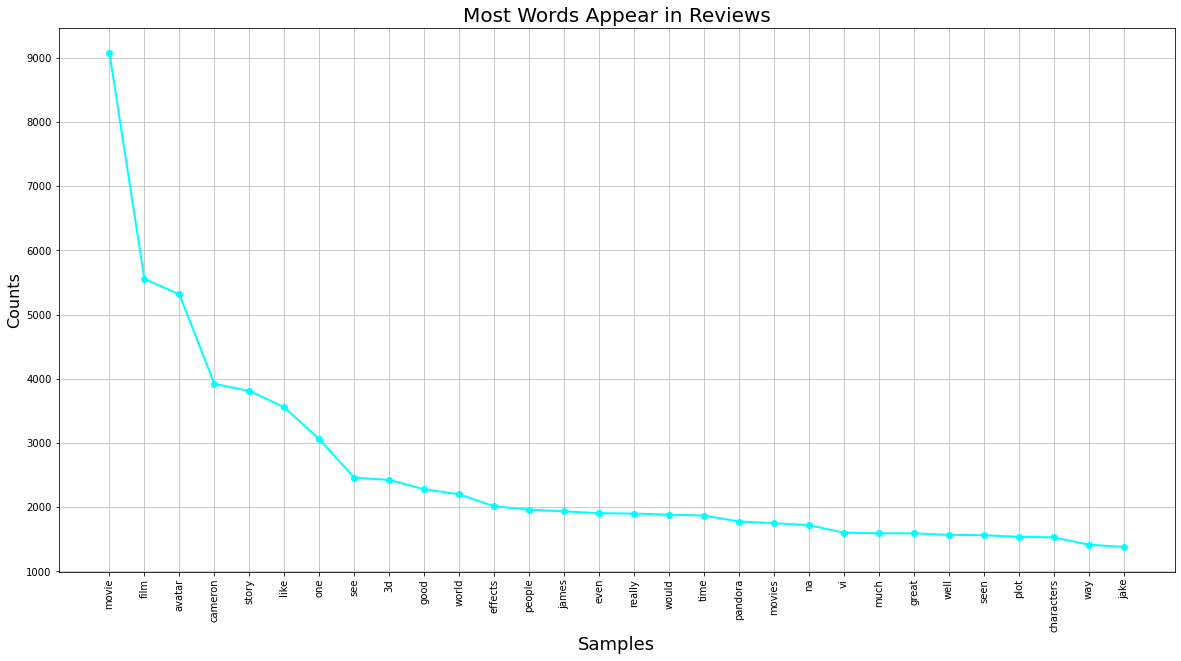

In [14]:
from nltk.probability import FreqDist
fdist=FreqDist(words)

import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots(figsize=(20, 10))
plt.title(label="Most Words Appear in Reviews", fontsize=20)
plt.xlabel('Words', fontsize=18)
plt.ylabel('Counts', fontsize=16)
fdist.plot(30,cumulative=False, marker = 'o', color = 'cyan')
          
plt.show()